In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("convertcsv.csv") #5minutes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    openTime                 500 non-null    int64  
 1   Open                      500 non-null    float64
 2   High                      500 non-null    float64
 3   Low                       500 non-null    float64
 4   Close                     500 non-null    float64
 5   Volume                    500 non-null    float64
 6   CloseTime                 500 non-null    int64  
 7   QuoteAssetVolume          500 non-null    float64
 8   NumberofTrades            500 non-null    int64  
 9   TakerbuyBaseAssetVolume   500 non-null    float64
 10  TakerbuyQuoteAssetVolume  500 non-null    float64
 11  Ignore                    500 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 47.0 KB


In [4]:
df.describe()

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore
count,5.000000e+02,500.00000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,5.000000e+02,500.0
mean,1.612493e+12,37491.86236,37563.147680,37416.423400,37492.511840,273.109615,1.612493e+12,1.024264e+07,7109.040000,133.692064,5.015325e+06,0.0
std,4.334455e+07,407.05192,399.739058,412.739884,407.578699,179.477742,4.334455e+07,6.743985e+06,3566.592629,95.975216,3.616007e+06,0.0
min,1.612418e+12,36306.59000,36450.000000,36161.950000,36306.720000,5.042264,1.612418e+12,1.912665e+05,143.000000,3.672303,1.392986e+05,0.0
25%,1.612455e+12,37225.61500,37296.800000,37156.455000,37225.615000,169.460643,1.612456e+12,6.344815e+06,5017.750000,79.763097,2.994745e+06,0.0
50%,1.612493e+12,37517.32500,37589.445000,37448.010000,37518.145000,220.804921,1.612493e+12,8.282801e+06,6080.500000,104.060605,3.913179e+06,0.0
75%,1.612530e+12,37781.22500,37842.355000,37732.550000,37784.665000,309.133512,1.612530e+12,1.158007e+07,8216.000000,155.253334,5.829486e+06,0.0
max,1.612568e+12,38662.58000,38708.270000,38430.170000,38664.520000,1458.644162,1.612568e+12,5.469735e+07,34323.000000,799.962298,3.083062e+07,0.0


In [5]:
df.head()

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore
0,1612417800000,37509.95,37631.57,37509.95,37575.08,159.634374,1612418099999,5.996784e+06,4109,79.733608,2.995319e+06,0
1,1612418100000,37579.92,37608.52,37535.78,37578.23,190.308601,1612418399999,7.151348e+06,3884,82.180689,3.087890e+06,0
2,1612418400000,37577.31,37665.29,37530.95,37645.94,265.376509,1612418699999,9.976781e+06,10777,108.755444,4.088577e+06,0
3,1612418700000,37645.94,37774.95,37609.99,37747.81,180.165884,1612418999999,6.794205e+06,7898,96.006577,3.619898e+06,0
4,1612419000000,37747.81,37840.70,37724.01,37753.36,166.829732,1612419299999,6.301913e+06,5751,81.755077,3.088511e+06,0


In [6]:
df = df[["Close"]]

In [7]:
df

,Close
0,37575.08
1,37578.23
2,37645.94
3,37747.81
4,37753.36
...,...
495,37968.70
496,37950.32
497,37960.99
498,37927.30


In [8]:
df.describe()

,Close
count,500.000000
mean,37492.511840
std,407.578699
min,36306.720000
25%,37225.615000
50%,37518.145000
75%,37784.665000
max,38664.520000


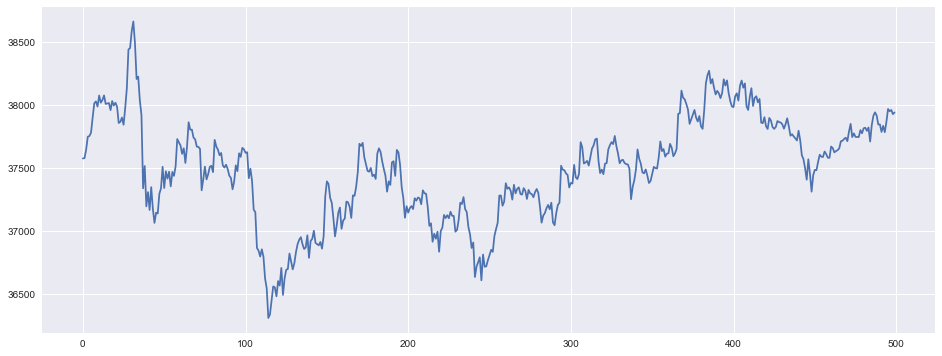

In [9]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(df.Close)

Calculate the percetange change

https://en.wikipedia.org/wiki/Stationary_process




In [10]:
df["returns"] = df.Close.pct_change()

In [11]:
df

,Close,returns
0,37575.08,NaN
1,37578.23,0.000084
2,37645.94,0.001802
3,37747.81,0.002706
4,37753.36,0.000147
...,...,...
495,37968.70,0.002712
496,37950.32,-0.000484
497,37960.99,0.000281
498,37927.30,-0.000887


In [12]:
1340.56/1338.18 - 1

0.0017785350251833254

Calculate the log returns

Why use log returns:
https://quantivity.wordpress.com/2011/02/21/why-log-returns


In [13]:
df["log_returns"] = np.log(1+df["returns"])

In [14]:
df.head(5)

,Close,returns,log_returns
0,37575.08,NaN,NaN
1,37578.23,0.000084,0.000084
2,37645.94,0.001802,0.001800
3,37747.81,0.002706,0.002702
4,37753.36,0.000147,0.000147


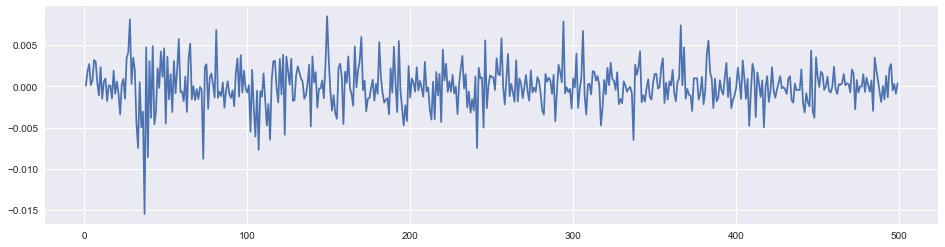

In [15]:
plt.figure(1, figsize=(16,4))
plt.plot(df.log_returns)

In [16]:
#quitamos los num's ceros y na p simplif
df.dropna(inplace=True)
X = df[["Close", "log_returns"]].values

In [17]:
#matrix con 2 valores
X

array([[ 3.75782300e+04,  8.38286431e-05],
       [ 3.76459400e+04,  1.80021975e-03],
       [ 3.77478100e+04,  2.70234766e-03],
       [ 3.77533600e+04,  1.47017590e-04],
       [ 3.77806500e+04,  7.22588439e-04],
       [ 3.79018500e+04,  3.20285677e-03],
       [ 3.80144600e+04,  2.96669010e-03],
       [ 3.80287700e+04,  3.76364870e-04],
       [ 3.79879100e+04, -1.07502732e-03],
       [ 3.80758800e+04,  2.31305958e-03],
       [ 3.80186500e+04, -1.50418199e-03],
       [ 3.80400300e+04,  5.62197518e-04],
       [ 3.80764300e+04,  9.56429208e-04],
       [ 3.80087400e+04, -1.77932225e-03],
       [ 3.80126600e+04,  1.03128856e-04],
       [ 3.80158100e+04,  8.28636957e-05],
       [ 3.79596800e+04, -1.47758205e-03],
       [ 3.80316900e+04,  1.89521577e-03],
       [ 3.79964000e+04, -9.28341157e-04],
       [ 3.80185000e+04,  5.81464966e-04],
       [ 3.79867300e+04, -8.35995151e-04],
       [ 3.78575300e+04, -3.40698492e-03],
       [ 3.78663000e+04,  2.31631180e-04],
       [ 3.

In [18]:
#para normalizar proximam
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)

In [20]:
X_scaled = scaler.transform(X)

In [21]:
X_scaled[:5]

array([[0.53927814, 0.64883916],
       [0.56799559, 0.72043149],
       [0.61120112, 0.75806012],
       [0.61355501, 0.65147483],
       [0.62512936, 0.67548245]])

In [22]:
y = [x[0] for x in X_scaled]

In [23]:
#serie de precios - precio del dia siguiente 
y[:5]

[0.5392781406395812,
 0.5679955891084933,
 0.6112011196878466,
 0.6135550089066104,
 0.6251293578759896]

In [24]:
#dividir nuestros datos en Train y en Test

In [25]:
split = int(len(X_scaled)*0.8)

In [26]:
print(split)  # es el .80 qty para Train

399


In [27]:
X_train = X_scaled[:split]

In [28]:
X_test = X_scaled[split:len(X_scaled)]


In [29]:
len(X_test)  #qty for test

100

In [30]:
y_train = y[:split]

In [31]:
y_test = y[split:len(y)]

In [32]:
#solo para asegurarnos q son iguales, si son difs es un error
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [33]:
X_train

array([[0.53927814, 0.64883916],
       [0.56799559, 0.72043149],
       [0.61120112, 0.75806012],
       [0.61355501, 0.65147483],
       [0.62512936, 0.67548245],
       [0.67653321, 0.77893684],
       [0.72429383, 0.7690861 ],
       [0.73036305, 0.66104113],
       [0.71303334, 0.60050215],
       [0.75034354, 0.74182254],
       [0.72607091, 0.58260169],
       [0.73513869, 0.66879239],
       [0.75057681, 0.68523617],
       [0.72186784, 0.57112533],
       [0.72353041, 0.64964419],
       [0.7248664 , 0.64879891],
       [0.70106031, 0.5837112 ],
       [0.73160149, 0.72439387],
       [0.71663415, 0.60662057],
       [0.72600729, 0.66959605],
       [0.71253287, 0.61047241],
       [0.65773603, 0.50323394],
       [0.66145559, 0.65500414],
       [0.67596064, 0.682998  ],
       [0.65174315, 0.58245443],
       [0.70776571, 0.79067859],
       [0.77386547, 0.81617255],
       [0.90552634, 0.98353982],
       [0.91016626, 0.65721126],
       [0.96703283, 0.79053076],
       [1.

In [34]:
y_train

[0.5392781406395812,
 0.5679955891084933,
 0.6112011196878466,
 0.6135550089066104,
 0.6251293578759896,
 0.6765332089235745,
 0.7242938332343716,
 0.7303630503011274,
 0.7130333361608319,
 0.7503435405886858,
 0.7260709135634951,
 0.7351386886080267,
 0.7505768088896456,
 0.7218678429044036,
 0.7235304097039634,
 0.7248664008821795,
 0.7010603104589048,
 0.7316014929171271,
 0.7166341504792637,
 0.7260072949359593,
 0.7125328696242281,
 0.6577360251081519,
 0.6614555941979834,
 0.6759606412757666,
 0.6517431503944362,
 0.7077657138010007,
 0.7738654678089762,
 0.9055263381117999,
 0.9101662566799558,
 0.9670328272118116,
 1.0000000000000018,
 0.9273899397743666,
 0.8059419798116902,
 0.8139791330901698,
 0.733853592331835,
 0.6843879888031257,
 0.43747137161761174,
 0.5126219357027733,
 0.3764102129103417,
 0.4245525489863464,
 0.36419967766562067,
 0.4412842480278236,
 0.36848757316142233,
 0.3206124353210651,
 0.35525489863431936,
 0.3522351344473673,
 0.41874628891339505,
 0.436877

Labeling using LSTM

memoria corto plazo,  el RNN (no memoriza)
output  t+1

In [35]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  #predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i-n:i, : X_test.shape[1]])
    ytest.append(y_test[i])  #predict next record

In [36]:
df.head(5)

,Close,returns,log_returns
1,37578.23,0.000084,0.000084
2,37645.94,0.001802,0.001800
3,37747.81,0.002706,0.002702
4,37753.36,0.000147,0.000147
5,37780.65,0.000723,0.000723


In [37]:
Xtrain[0]

array([[0.53927814, 0.64883916],
       [0.56799559, 0.72043149],
       [0.61120112, 0.75806012]])

In [38]:
ytrain[0]

0.6135550089066104

In [39]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [40]:
scaler.inverse_transform(val)

array([[ 3.77533600e+04, -1.54717713e-02]])

In a LSTM network the input for each LSTM layer needs next informaiton:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:
(number of observatios, number of steps, number of features per step)



In [41]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))

In [42]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))


In [43]:
Xtest, ytest = (np.array(Xtest), np.array(ytest))

In [44]:
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [45]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(396, 3, 2)
(396,)
---
(97, 3, 2)
(97,)


### install tensorflow and keras


https://margaretmz.medium.com/anaconda-jupyter-notebook-tensorflow-and-keras-b91f381405f8

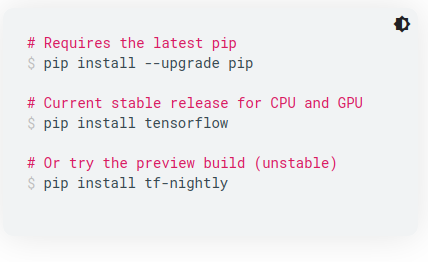




In [46]:
#pip install tensorflow (es para cuando tienes GPU (acelerador grafico en la lap))
#pip install tf-nightly (para cuando no tienes acelerador grafico)
#pip install keras

In [47]:
#verificamos si está instalado el tensorflow
#print ("TensorFlow version: " + tf.__version__)

### LSTM Model

In [48]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [49]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/100
25/25 [==============================] - 4s 79ms/step - loss: 0.3481 - val_loss: 0.4145
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.2367 - val_loss: 0.3008
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1550 - val_loss: 0.2124
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1064 - val_loss: 0.1415
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0686 - val_loss: 0.0882
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0406 - val_loss: 0.0519
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0294 - val_loss: 0.0307
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.0218
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.0174
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0168
Epoch 11

25/25 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 7.5220e-04
Epoch 82/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 7.3068e-04
Epoch 83/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 7.5582e-04
Epoch 84/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 7.2743e-04
Epoch 85/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 7.6623e-04
Epoch 86/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 7.6275e-04
Epoch 87/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 7.8471e-04
Epoch 88/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 7.8832e-04
Epoch 89/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 7.2269e-04
Epoch 90/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [51]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [52]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [53]:
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [54]:
print(trainPredict[:20])
print(testPredict[:20])

[37671.92301139354, 37719.95675322532, 37756.704062433244, 37819.89852869034, 37924.015061564445, 37987.83435012818, 37970.97229892731, 37996.06665806293, 37962.40916964531, 37999.102232022284, 37989.63011698246, 37973.32149588585, 37967.61096291065, 37942.977561302185, 37925.045470280646, 37959.32019207001, 37934.88803777218, 37975.38371867657, 37932.8483007145, 37857.996387238505]
[38016.41596538544, 38010.046319360736, 38059.822424430844, 38085.82605039597, 38103.86101364613, 38096.608521528244, 37960.43436014176, 37931.97838391781, 37935.38581568718, 38034.198807353976, 37994.12557715893, 38001.38678249836, 37967.30993515968, 37990.90365268708, 37987.14937848568, 37854.257009835244, 37833.21739050865, 37803.515142531396, 37809.16131009579, 37794.58718223095]


In [55]:
print(trainPredict)


[37671.92301139354, 37719.95675322532, 37756.704062433244, 37819.89852869034, 37924.015061564445, 37987.83435012818, 37970.97229892731, 37996.06665806293, 37962.40916964531, 37999.102232022284, 37989.63011698246, 37973.32149588585, 37967.61096291065, 37942.977561302185, 37925.045470280646, 37959.32019207001, 37934.88803777218, 37975.38371867657, 37932.8483007145, 37857.996387238505, 37823.08897313595, 37817.54286708355, 37819.98566090584, 37898.822889490126, 37999.25260536194, 38263.33011338234, 38340.07813629627, 38462.95001909256, 38454.44197985649, 38385.06056415558, 38161.84806520462, 38077.13109850407, 37937.726299424176, 37911.01268643856, 37462.57289658904, 37463.414284611936, 37171.10818734288, 37312.62566157698, 37134.852261669635, 37286.18721774936, 37169.362029637094, 37136.547896744014, 37087.322832669015, 37089.688542587755, 37214.65194989562, 37265.22159053802, 37427.94880272269, 37358.335783971546, 37446.41422722459, 37363.39380908131, 37451.24514643073, 37352.831487329,

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
#calculate root mean squared error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

Train Score: 37385.80 RMSE


In [58]:
testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 37754.23 RMSE


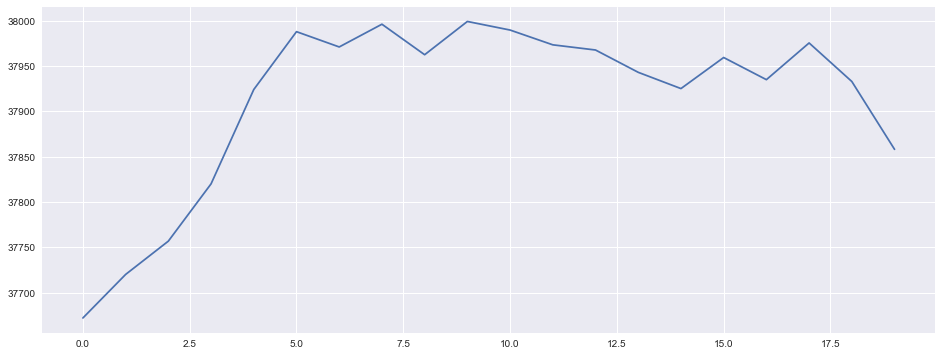

In [59]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(trainPredict[:20])

In [60]:
# Apilar los __DataFrames__ uno encima del otro
type(df.Close)

pandas.core.series.Series

In [61]:
type(trainPredict[:20])

list

In [62]:
df_close_list = df.Close.tolist()

In [63]:
tendencia = df_close_list + trainPredict[:20]

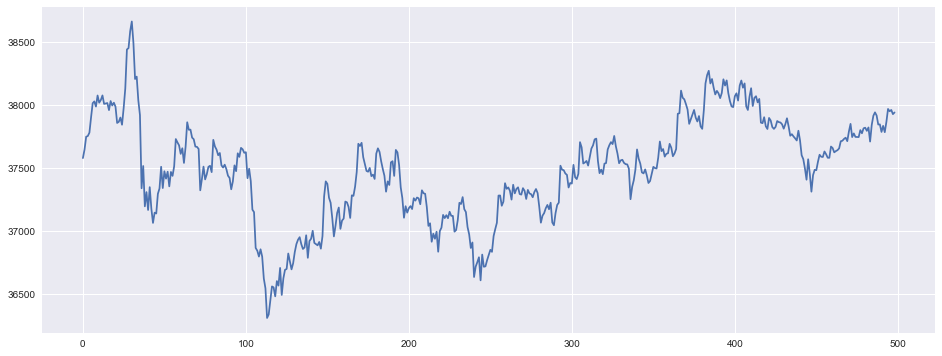

In [64]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(df_close_list)

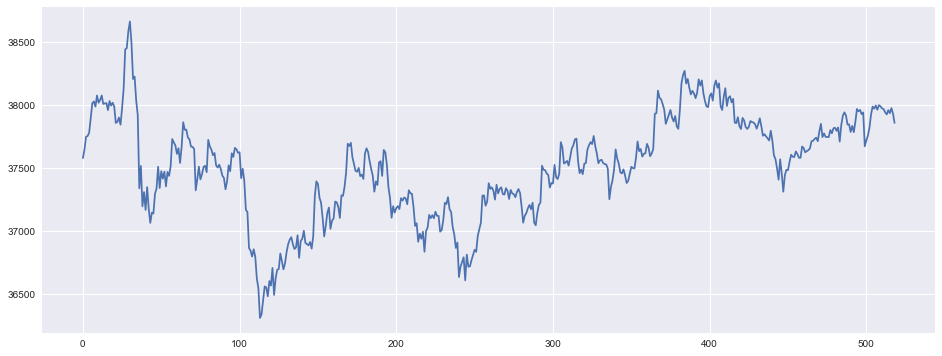

In [65]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(tendencia)